In [1]:
from dgpsi import dgp, kernel, combine, lgp, path, emulator
import numpy as np
import matplotlib.pyplot as plt

Link two computer models emulated by two 2-layered DGP models

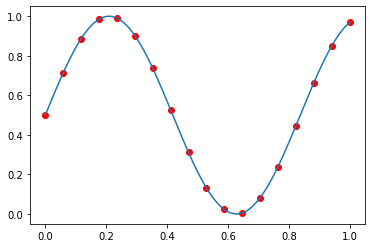

In [2]:
#First model
n=18
X1=np.linspace(0,1.,n)[:,None]
f1= lambda x: (np.sin(7.5*x)+1)/2
Y1=np.array([f1(x) for x in X1]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f1(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X1,Y1,color='r')

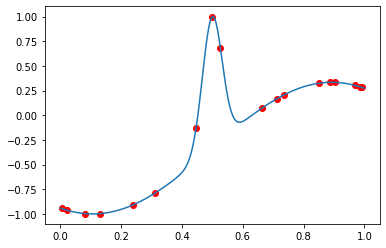

In [3]:
#Second model
X2=Y1
f2= lambda x: 2/3*np.sin(2*(2*x-1))+4/3*np.exp(-30*(2*(2*x-1))**2)-1/3  
Y2=np.array([f2(x) for x in X2]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f2(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X2,Y2,color='r')

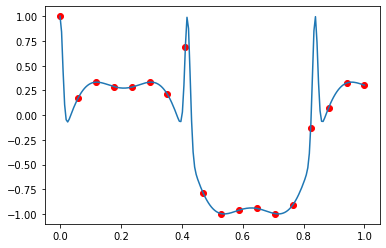

In [4]:
#Overall model
Yt=np.array([f2(f1(x)) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X1,Y2,color='r')

In [5]:
#Construct 4 layers with first two layers as the DGP for the first model and the last two layers as the DGP of the second model
layer1=[kernel(length=np.array([1.]),name='matern2.5')]
layer2=[kernel(length=np.array([1.]),name='matern2.5',scale_est=1)]
layer3=[kernel(length=np.array([1.]),name='matern2.5')]
layer4=[kernel(length=np.array([1.]),name='matern2.5',scale_est=1)]
all_layer=combine(layer1,layer2,layer3,layer4)

In [6]:
#Provide outputs of GPs in each layer
Y=[np.full((len(Y1),1),np.nan),Y1,np.full((len(Y1),1),np.nan),Y2]

In [7]:
m=dgp(X1,Y,all_layer)
m.train(N=500)

Iteration 500: Layer 4: 100%|██████████| 500/500 [00:38<00:00, 12.83it/s]


In [9]:
#Build emulator
final_layer_obj=m.estimate()
emu=emulator(final_layer_obj)

In [10]:
#Make predictions
z=np.linspace(0,1,300)[:,None].reshape(-1,1)
mu,var=emu.predict(z, method='mean_var')

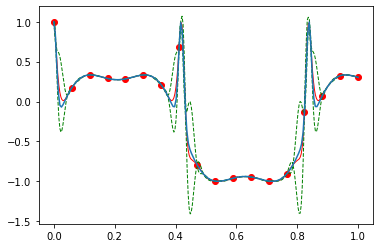

In [11]:
#Plot output
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt)
plt.scatter(X1,Y2,color='r')

Link two computer models emulated by two GP models

In [12]:
#Construct two-layered structure
layer1=[kernel(length=np.array([0.1]),name='matern2.5',scale_est=1,input_dim=np.arange(1))]
layer2=[kernel(length=np.array([0.1]),name='matern2.5',scale_est=1,input_dim=np.arange(1))]
all_layer=combine(layer1,layer2)

In [13]:
#Create data for each GP
X=[[X1],[Y1]]
Y=[[Y1],[Y2]]
m0=lgp(X,Y,all_layer)

In [14]:
#Train model
m0.train()

Layer 2: Node 1: 100%|██████████| 2/2 [00:00<00:00, 144.51it/s]


In [15]:
#Make predictions
z=np.linspace(0,1,300)[:,None].reshape(-1,1)
mu,var=m0.predict(x=z,z=None)

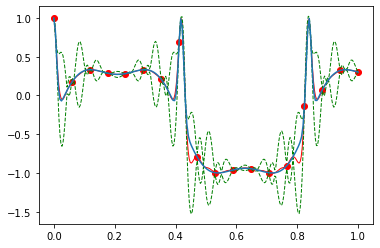

In [16]:
#Draw outputs
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt)
plt.scatter(X1,Y2,color='r')